In [2]:
from O.NN.pgm_rb import *

In [ ]:
# results based on the q_{i}^{NPT} model used in mivebresib, in the paper

In [ ]:
# missing files to run this notebook (hopefully the link works): https://zenodo.org/records/17657057

In [5]:
'''
PGM instance name: *name* from notebooks '_JN - mivebresib (gaff 0.5nm)' and '_JN - mivebresib (tmff 0.5nm)'
'''

list_forms = ['I','II','III']

names_GAFF = {
'I':'rb_mivebresib_gaff_Form_I_Cell_121_Temp_300_lr0.5_sym_adjusted_ext_setting_2',
'II':'rb_mivebresib_gaff_Form_II_Cell_421_Temp_300_lr0.5_sym_adjusted_ext_setting_2',
'III':'rb_mivebresib_gaff_Form_III_Cell_211_Temp_300_lr0.5_sym_adjusted_ext_setting_2'
}

names_TMFF = {
'I':'rb_mivebresib_tmff_Form_I_Cell_121_Temp_200_lr0.5_sym_reduced_ext_setting_2',
'II':'rb_mivebresib_tmff_Form_II_Cell_421_Temp_200_lr0.5_sym_reduced_ext_setting_2',
'III':'rb_mivebresib_tmff_Form_III_Cell_211_Temp_200_lr0.5_sym_reduced_ext_setting_2'
}


In [7]:
nns_GAFF = {}
nns_TMFF = {}
for form in list_forms:
    nn = NN_interface_sc_multimap_rb(name = names_GAFF[form],
                                     paths_datasets=[0,],
                                     training = False,
                                    )
    nn.load_misc_()
    nn.solve_BAR_using_pymbar_(rerun=False)
    nns_GAFF[form] =  nn
    ##
    nn = NN_interface_sc_multimap_rb(name = names_TMFF[form],
                                     paths_datasets=[0,],
                                     training = False,
                                    )
    nn.load_misc_()
    nn.solve_BAR_using_pymbar_(rerun=False)
    nns_TMFF[form] =  nn

found saved BAR result
found saved BAR result
found saved BAR result
found saved BAR result
found saved BAR result
found saved BAR result


     grid search estimate (kT) : 381.6972            +/- standard deviation : 0.0968              
     final pymbar result  (kT) : 381.6972            +/- standard error     : 0.1126 
     grid search estimate (kT) : -452.0946           +/- standard deviation : 0.0866              
     final pymbar result  (kT) : -452.0946           +/- standard error     : 0.0998 
     grid search estimate (kT) : 384.0715            +/- standard deviation : 0.0925              
     final pymbar result  (kT) : 384.0715            +/- standard error     : 0.107  
     grid search estimate (kT) : -454.4624           +/- standard deviation : 0.0616              
     final pymbar result  (kT) : -454.4624           +/- standard error     : 0.0628 
     grid search estimate (kT) : 381.4433            +/- standard deviation : 0.1141              
     final pymbar result  (kT) : 381.4433            +/- standard error     : 0.1225 
     grid search estimate (kT) : -454.6227           +/- standard deviation

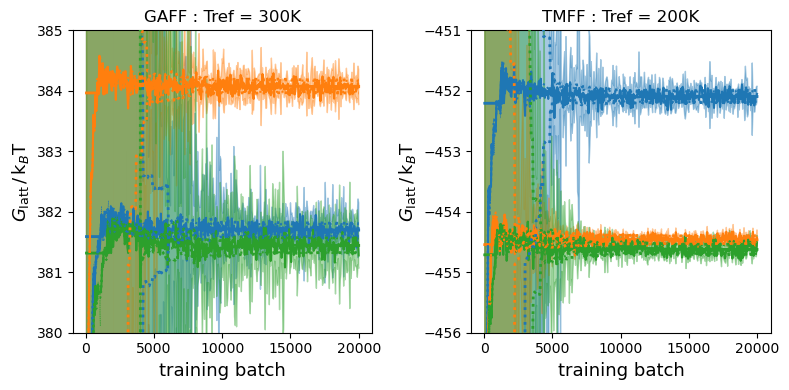

In [37]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

for i, form in enumerate(list_forms):
    nns_GAFF[form].plot_result_(n_mol=16, colors = [f'C{i}']*4, ax=ax[0])
    ax[0].set_ylim(380,380+5)
    ax[0].set_title('GAFF : Tref = 300K')
    
    nns_TMFF[form].plot_result_(n_mol=16, colors = [f'C{i}']*4, ax=ax[1])
    ax[1].set_ylim(-456,-456+5)
    ax[1].set_title('TMFF : Tref = 200K')
    
[_ax.set_ylabel(r'$G_{\text{latt}} \,/\, \text{k}_{B}\text{T}$') for _ax in ax]

plt.tight_layout()

# GAFF

In [43]:
[nn.load_energies_during_training_() for nn in nns_GAFF.values()];
## these are enthalpies in this case

T estimate399skipped

[None, None, None]

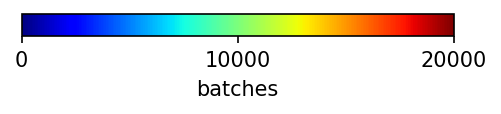

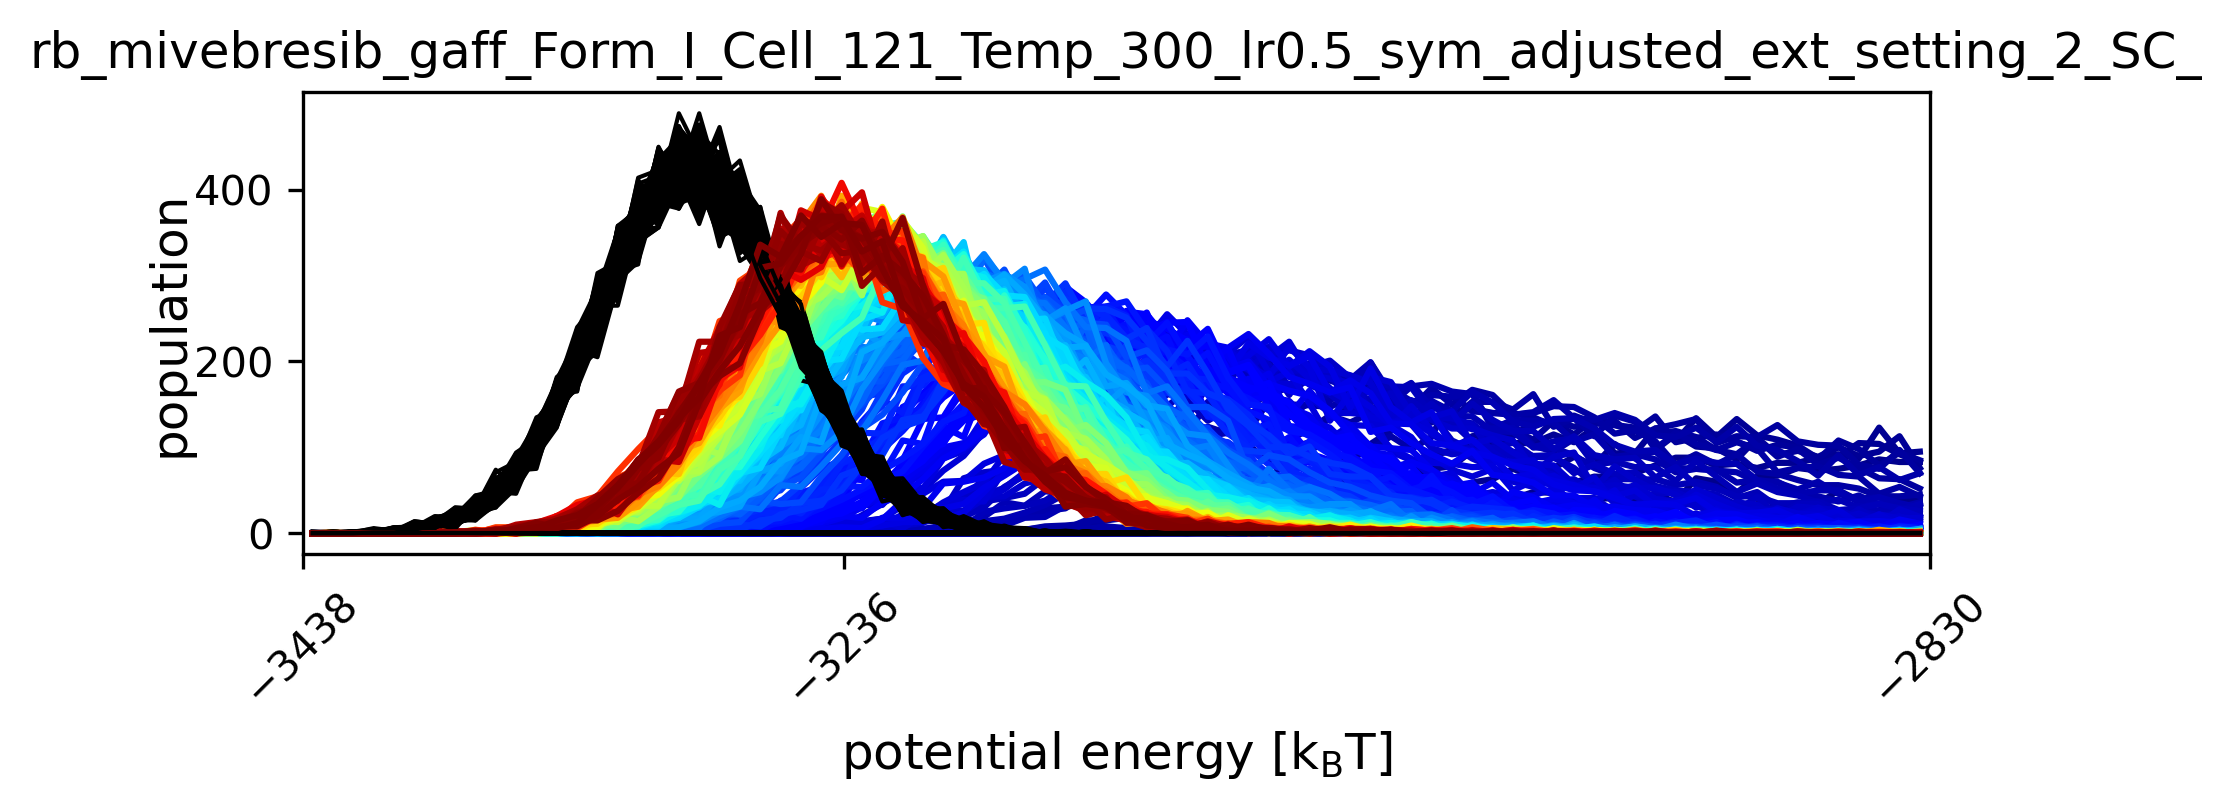

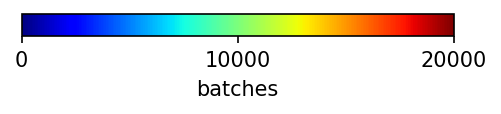

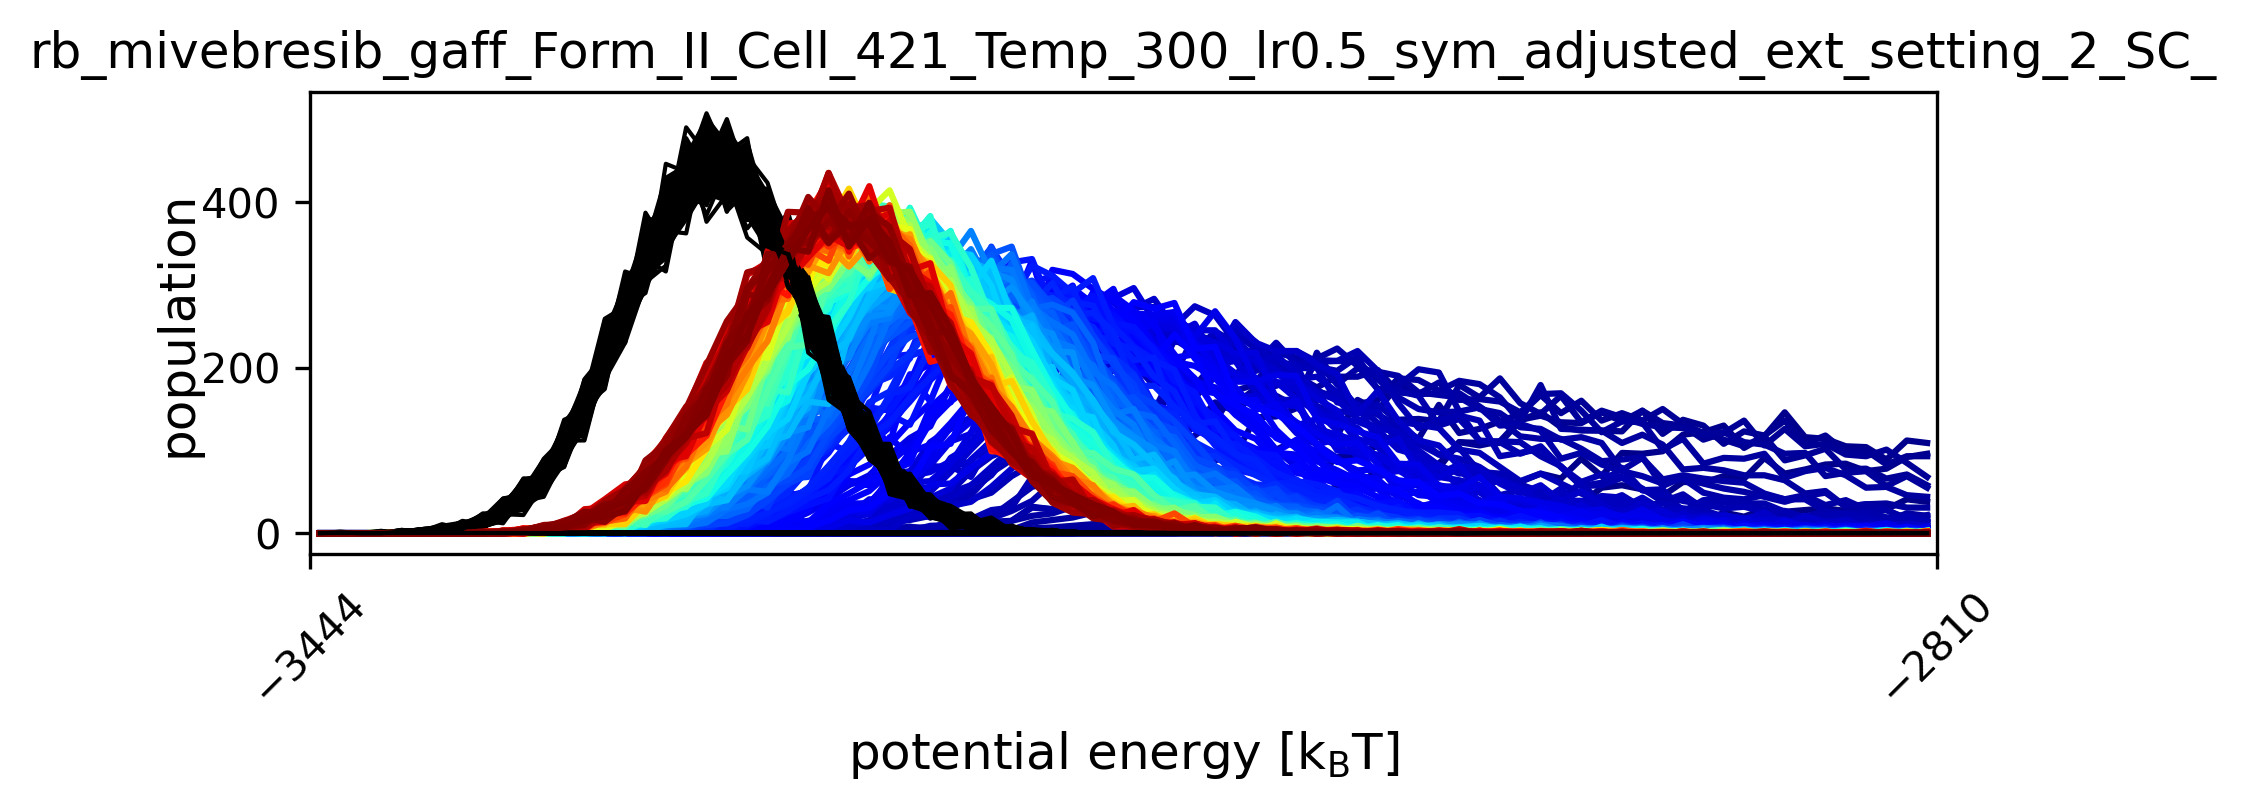

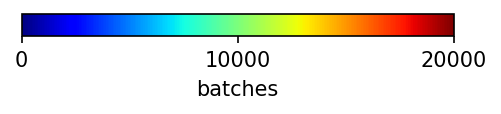

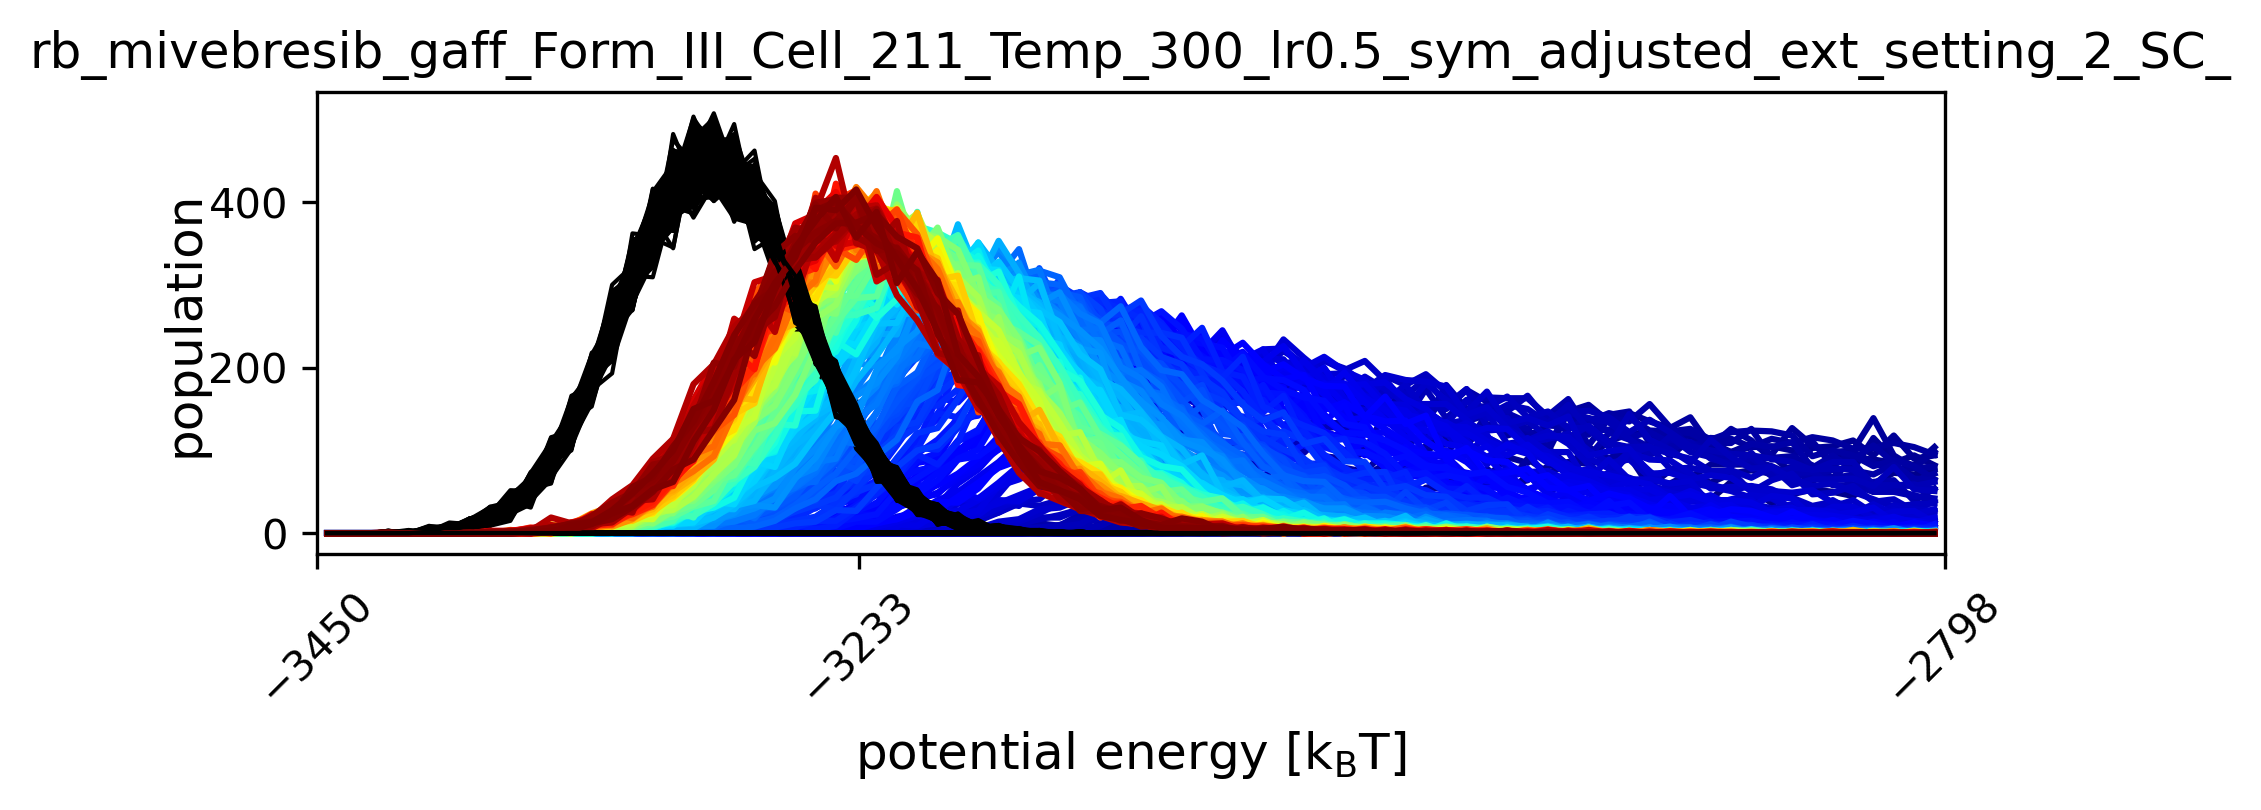

In [44]:
[nn.plot_energies_during_training_() for nn in nns_GAFF.values()];

# TMFF

In [102]:
[nn.load_energies_during_training_() for nn in nns_TMFF.values()];

T estimate399skipped

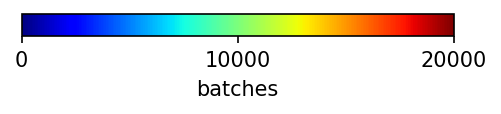

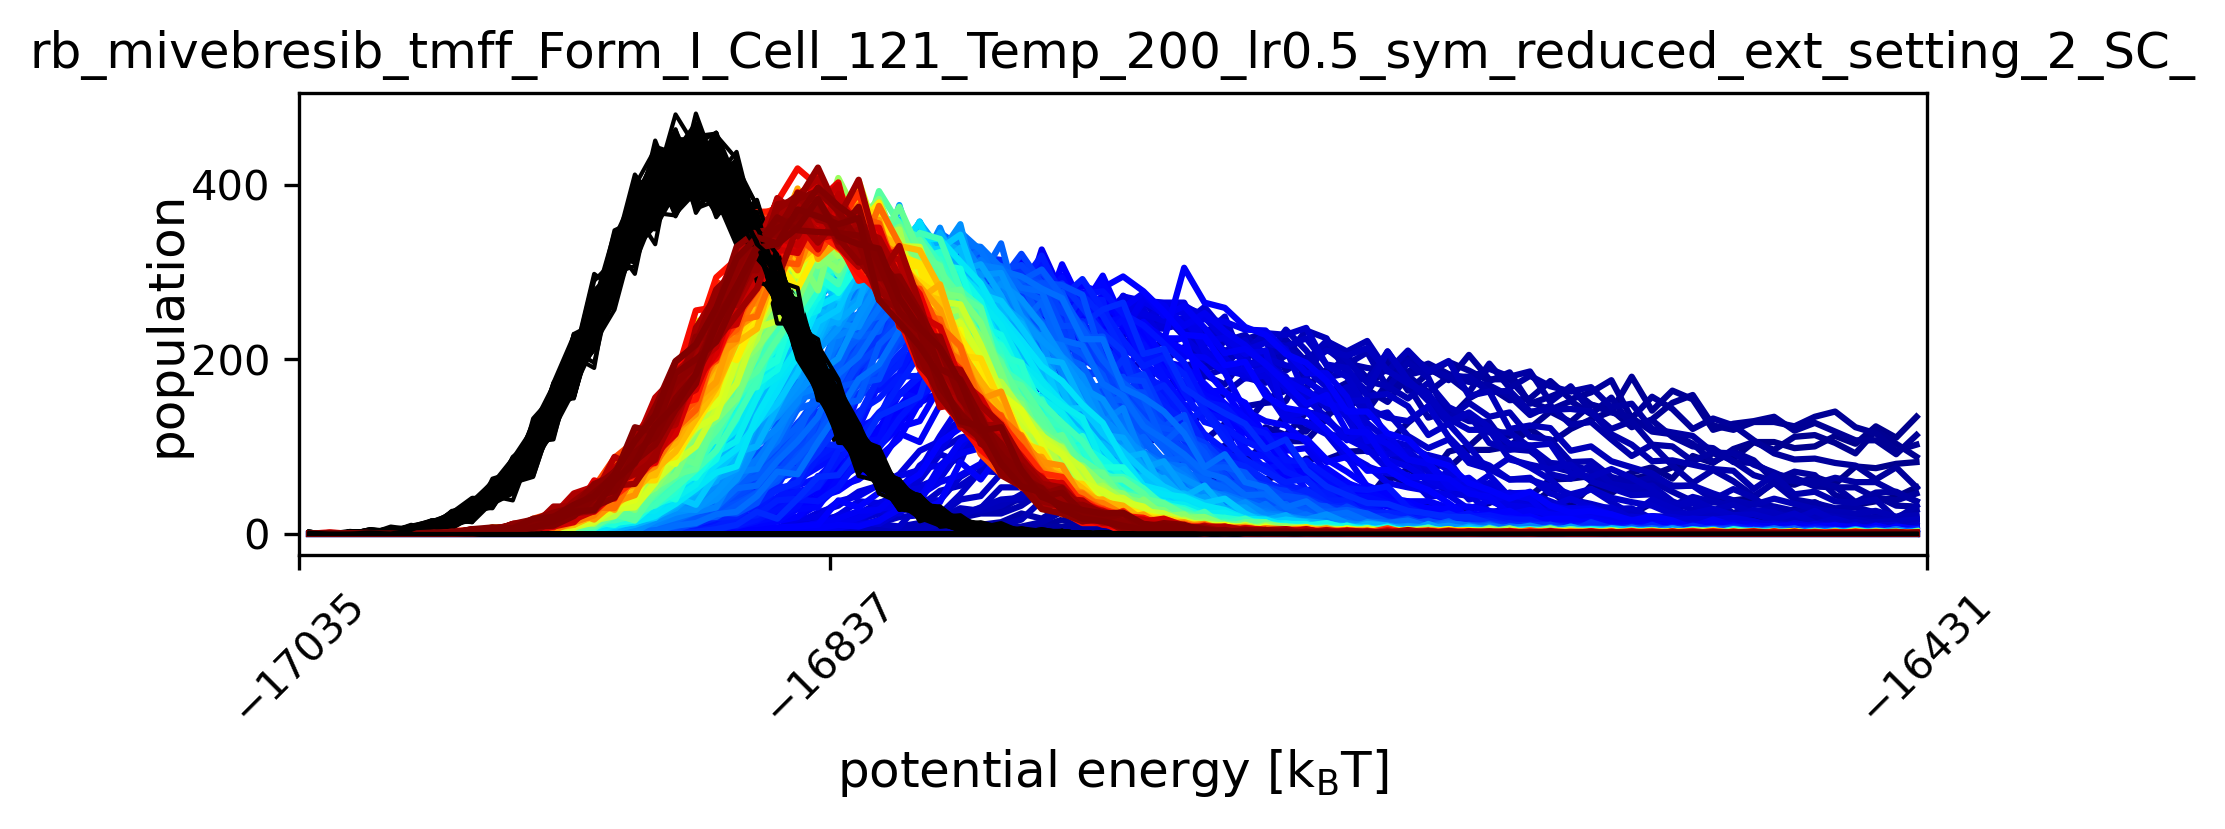

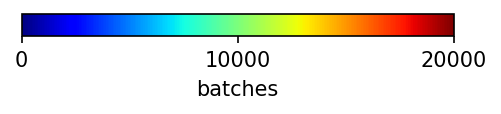

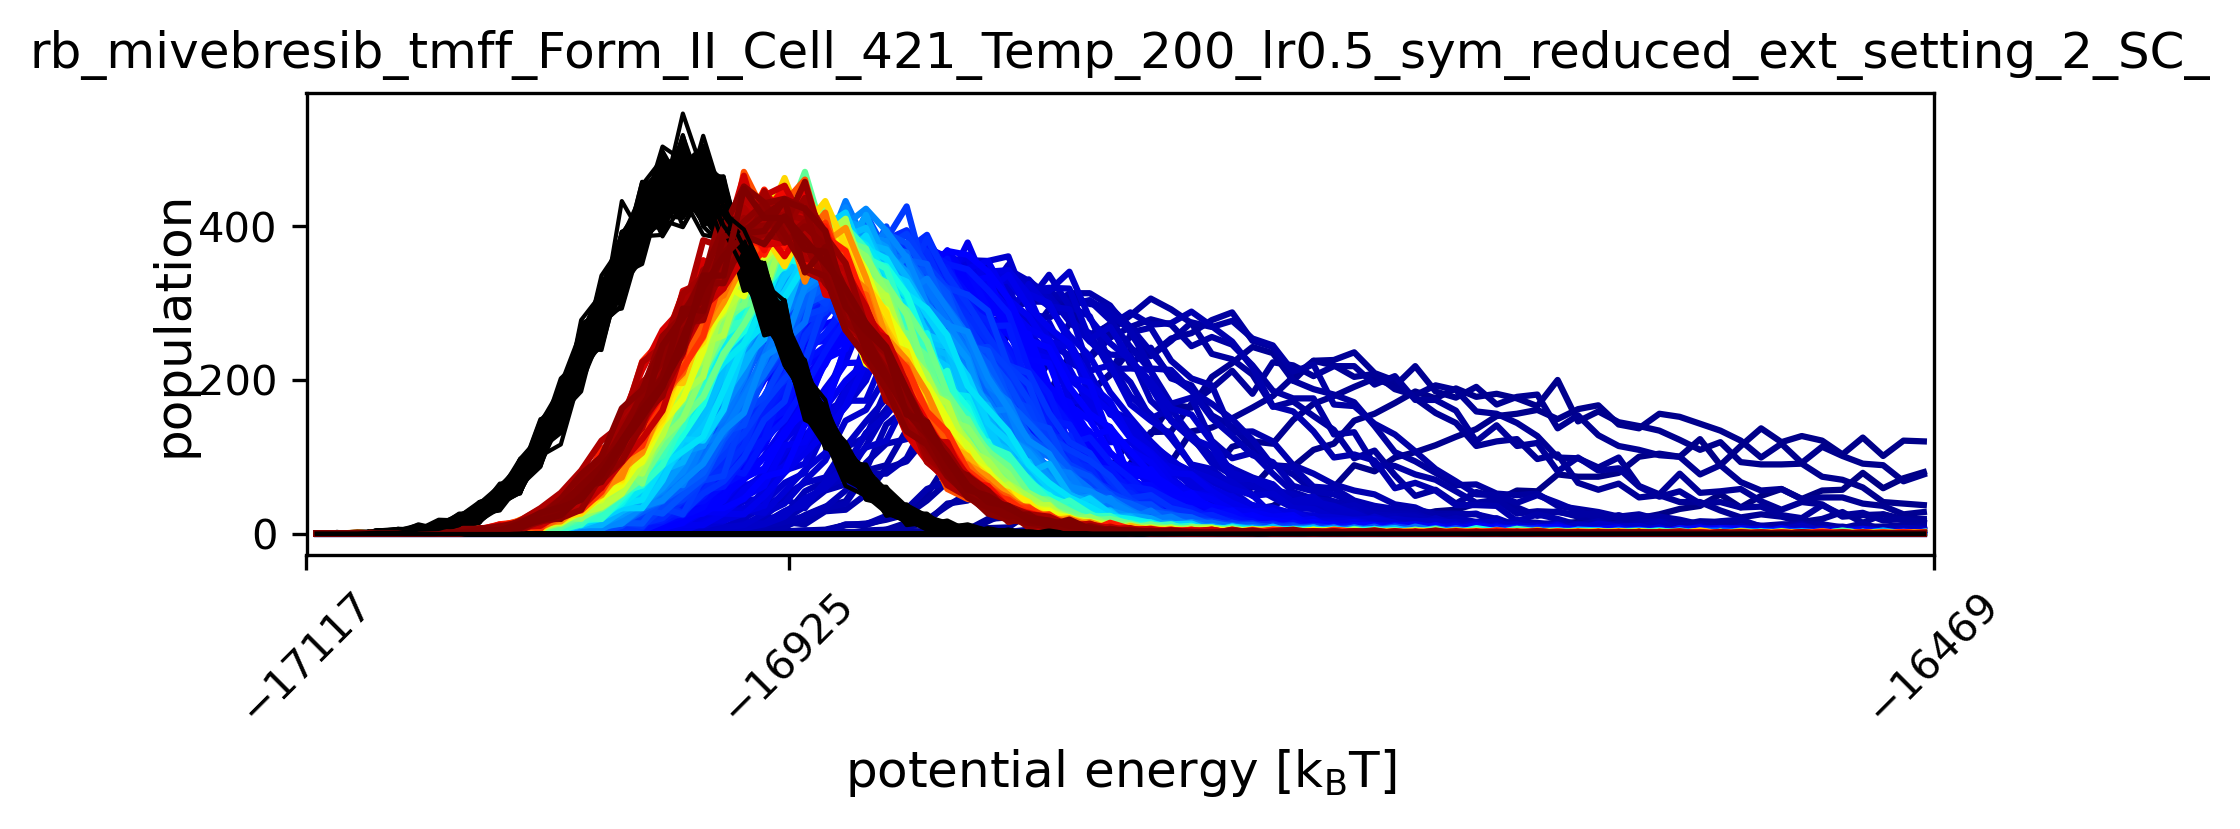

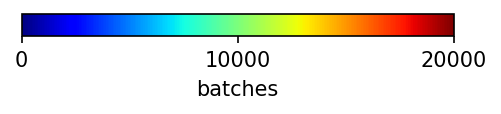

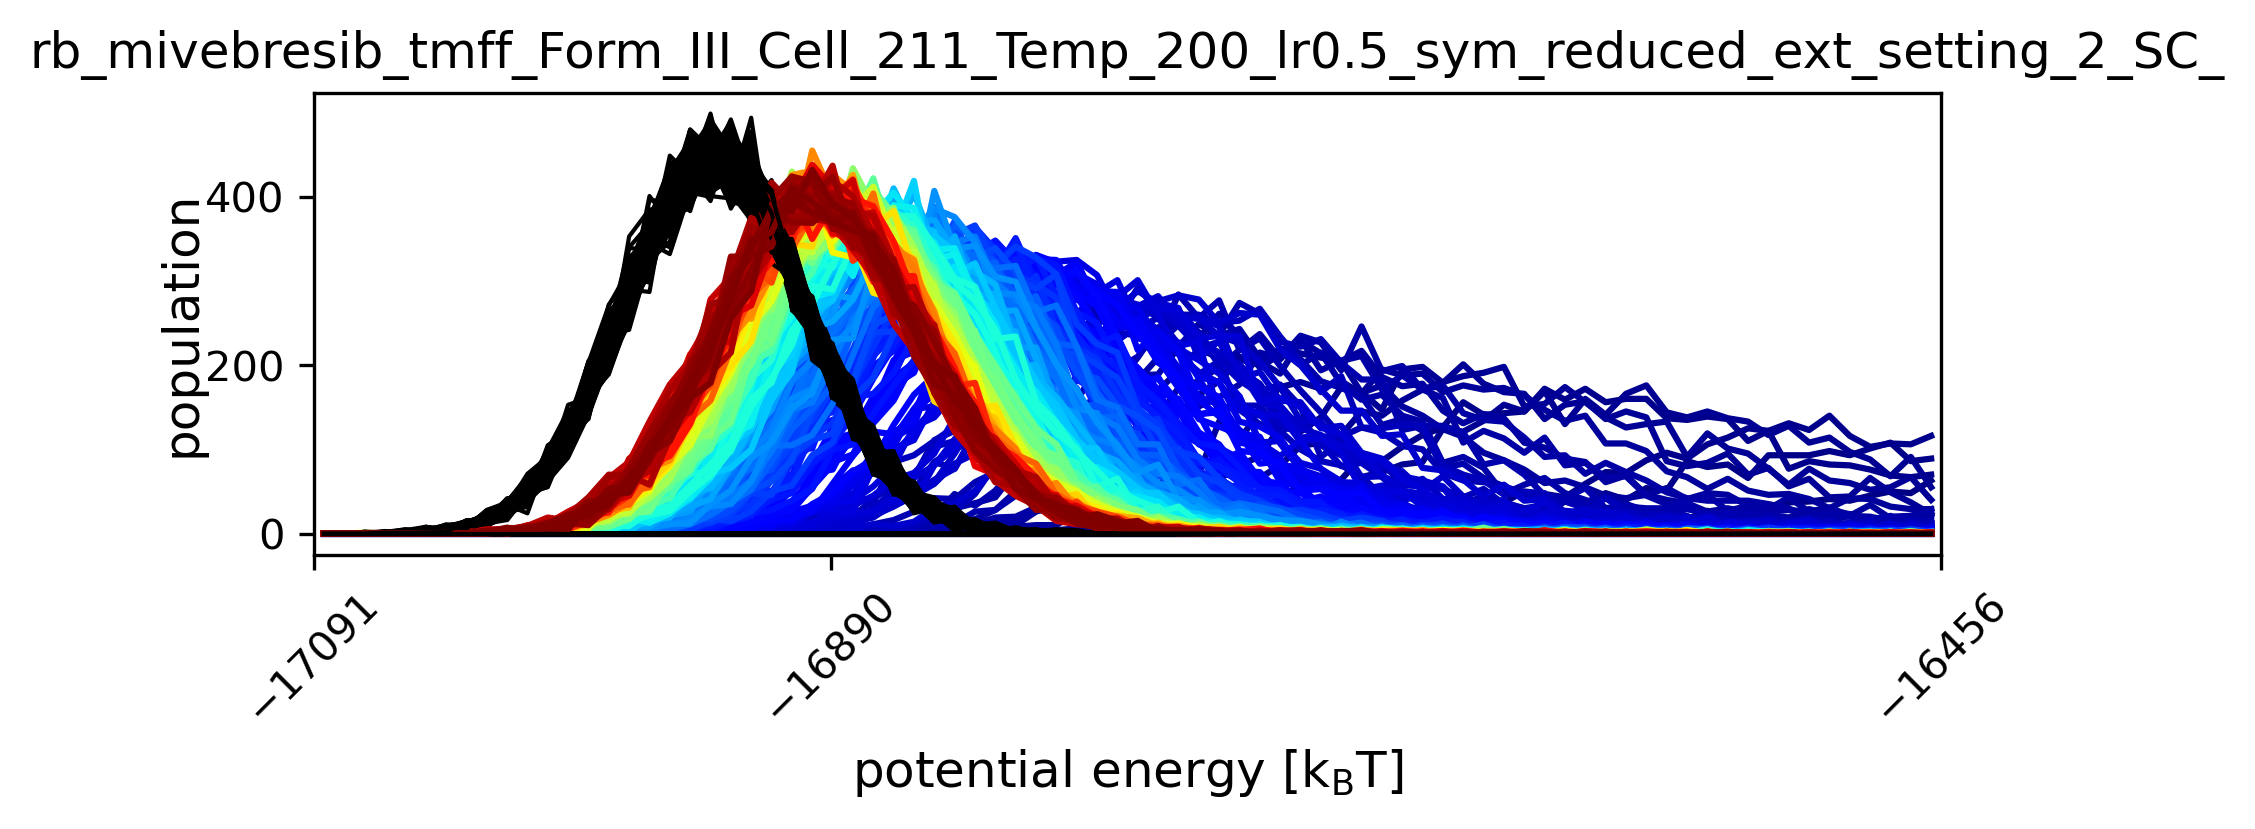

In [117]:
[nn.plot_energies_during_training_() for nn in nns_TMFF.values()];

## loading a model to check (sampling step can be slow):

In [ ]:
# can alternatively load samples that were saved:
'''
nns_GAFF['I'].load_samples_()
rb = nns_GAFF['I'].samples_from_model[0]
''';

In [51]:
[nn.load_model_() for nn in nns_GAFF.values()]

[06:09:46] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[06:09:46] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.


n_att_heads = 4, n_layers = 4


[06:09:50] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[06:09:50] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.


n_att_heads = 4, n_layers = 4


[06:09:53] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[06:09:53] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.


n_att_heads = 4, n_layers = 4


[None, None, None]

In [52]:
for nn in nns_GAFF.values():
    nn.evaluation_batch_size = 1000 # 5000 usually

### form I GAFF 300K, 1atm

In [53]:
rb = nns_GAFF['I'].sample_model_(20000)

In [54]:
rb.shape

(20000, 819, 3)

In [55]:
r,b = rb_to_r_b_(rb)

In [56]:
r.shape, b.shape

((20000, 816, 3), (20000, 3, 3))

In [59]:
rb_no_coupling = nns_GAFF['I'].model._inverse_represenation_(nns_GAFF['I'].model.sample_base_(20000))[0].numpy()

In [60]:
r_untrained, b_untrained = rb_to_r_b_(rb_no_coupling)

In [62]:
r_untrained.shape, b_untrained.shape

((20000, 816, 3), (20000, 3, 3))

In [57]:
def plot_box_lengths_angles_histograms2_(boxess, b0 = None, b1=None, colors = ['red','blue']):
    fig, ax = plt.subplots(2,1, figsize=(4,4), dpi=100)
    for boxes, color in zip(boxess, colors):
    
        cell_NPT = cell_lengths_and_angles_(boxes)
        if b0 is None: b0 = np.array(boxes[0])
        else: b0 = np.array(b0).reshape([3,3])
        if b1 is None: b1 = np.array(b0)
        else: b1 = np.array(b1).reshape([3,3])
    
        cell_in = cell_lengths_and_angles_(b0)
        cell_out = cell_lengths_and_angles_(b1)
        
        Max0 = max([
            plot_1D_histogram_(cell_NPT[:,0], bins=30, ax=ax[0], return_max_y=True, color=color),
            plot_1D_histogram_(cell_NPT[:,1], bins=30, ax=ax[0], return_max_y=True, color=color),
            plot_1D_histogram_(cell_NPT[:,2], bins=30, ax=ax[0], return_max_y=True, color=color),
            ])
        Max1 = max([
            plot_1D_histogram_(cell_NPT[:,3], bins=30, ax=ax[1], return_max_y=True, color=color),
            plot_1D_histogram_(cell_NPT[:,4], bins=30, ax=ax[1], return_max_y=True, color=color),
            plot_1D_histogram_(cell_NPT[:,5], bins=30, ax=ax[1], return_max_y=True, color=color),
            ])

        ax[0].set_xlabel('box vector lengths / nm')
        ax[1].set_xlabel('box vector angles / degrees')
    
    plt.tight_layout()
    plt.show()

def wrap_r_into_b_(r,b):
    s = np.einsum('omi,oij->omj', r, np.linalg.inv(b))
    return np.mod(s,1)

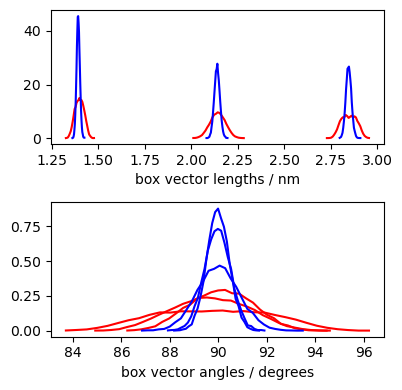

In [63]:
plot_box_lengths_angles_histograms2_([b_untrained,b])

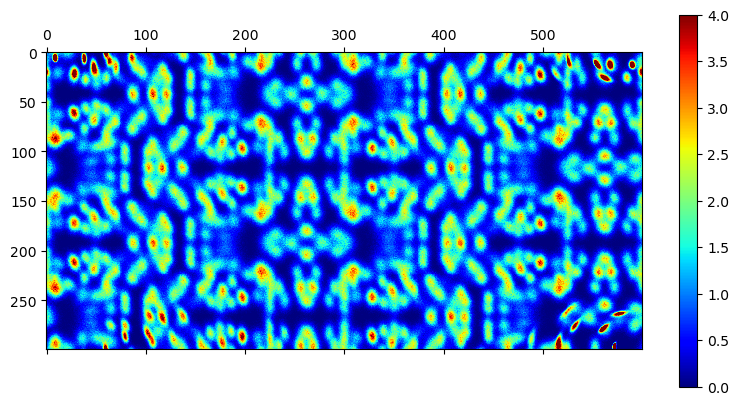

In [70]:
show = wrap_r_into_b_(r, b)
hist = np.histogramdd(np.stack([show[...,1].flatten(),show[...,0].flatten()],axis=-1), bins=[300,600], range=[[0,1]]*2,
                          density=True,
                          )[0]
plt.matshow(hist,
            vmin = 0,
            vmax = 4,
            cmap='jet'
           )
plt.colorbar()

In [71]:
show.shape

(20000, 816, 3)

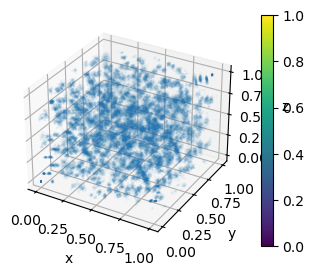

In [84]:
plot_points_(np.stack([show[:100,:,0].flatten(), show[:100,:,1].flatten(), show[:100,:,2].flatten()], axis=-1), s=0.001)

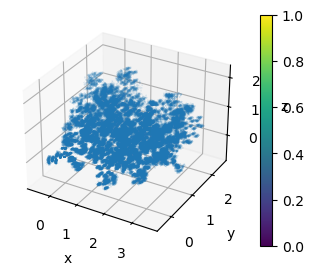

In [97]:
plot_points_(np.stack([r[:100,:,0].flatten(), r[:100,:,1].flatten(), r[:100,:,2].flatten()], axis=-1), s=0.01) # nm

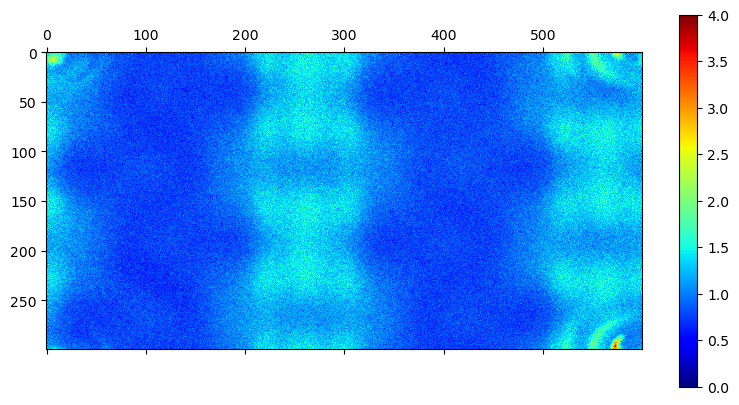

In [85]:
show = wrap_r_into_b_(r_untrained, b_untrained)
hist = np.histogramdd(np.stack([show[...,1].flatten(),show[...,0].flatten()],axis=-1), bins=[300,600], range=[[0,1]]*2,
                          density=True,
                          )[0]
plt.matshow(hist,
            vmin = 0,
            vmax = 4,
            cmap='jet'
           )
plt.colorbar()

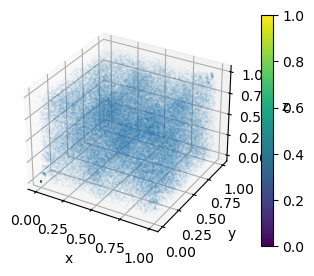

In [86]:
plot_points_(np.stack([show[:100,:,0].flatten(), show[:100,:,1].flatten(), show[:100,:,2].flatten()], axis=-1), s=0.001)

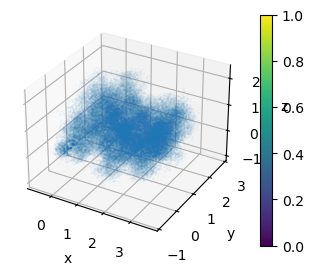

In [98]:
plot_points_(np.stack([r_untrained[:100,:,0].flatten(), r_untrained[:100,:,1].flatten(), r_untrained[:100,:,2].flatten()], axis=-1), s=0.001) # nm

### form I TMFF 200K, 1atm

In [100]:
[nn.load_model_() for nn in nns_TMFF.values()]

for nn in nns_TMFF.values():
    nn.evaluation_batch_size = 1000 # 5000 usually

[06:30:53] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[06:30:53] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.


n_att_heads = 4, n_layers = 4


[06:30:56] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[06:30:56] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.


n_att_heads = 4, n_layers = 4


[06:30:58] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.
[06:30:58] Depickling from a version number (16.2)that is higher than our version (16.1).
This probably won't work.


n_att_heads = 4, n_layers = 4


In [103]:
r, b = rb_to_r_b_(nns_TMFF['I'].sample_model_(20000))

In [105]:
r_untrained, b_untrained = rb_to_r_b_(nns_TMFF['I'].model._inverse_represenation_(nns_TMFF['I'].model.sample_base_(20000))[0].numpy())

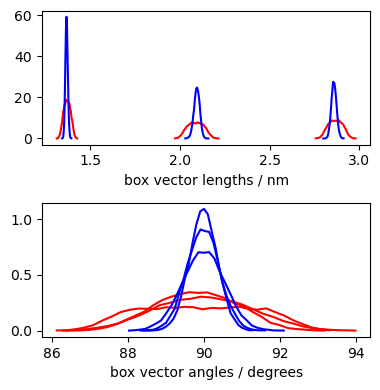

In [106]:
plot_box_lengths_angles_histograms2_([b_untrained,b])

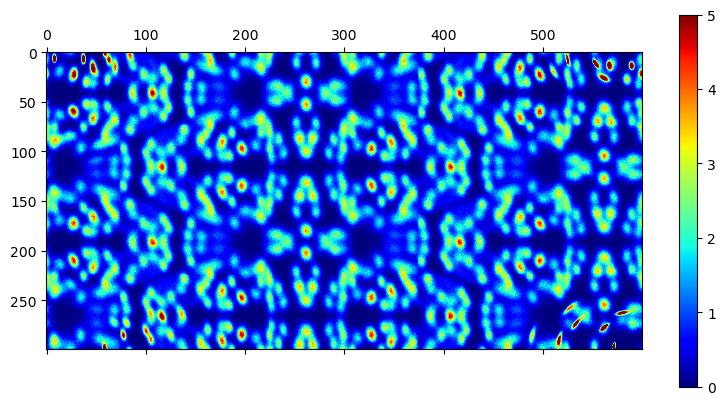

In [111]:
show = wrap_r_into_b_(r, b)
hist = np.histogramdd(np.stack([show[...,1].flatten(),show[...,0].flatten()],axis=-1), bins=[300,600], range=[[0,1]]*2,
                          density=True,
                          )[0]
plt.matshow(hist,
            vmin = 0,
            vmax = 5,
            cmap='jet'
           )
plt.colorbar()

In [112]:
plot_points_(np.stack([show[:100,:,0].flatten(), show[:100,:,1].flatten(), show[:100,:,2].flatten()], axis=-1), s=0.001)

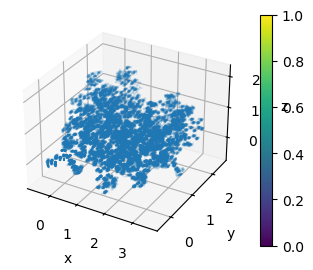

In [113]:
plot_points_(np.stack([r[:100,:,0].flatten(), r[:100,:,1].flatten(), r[:100,:,2].flatten()], axis=-1), s=0.01) # nm

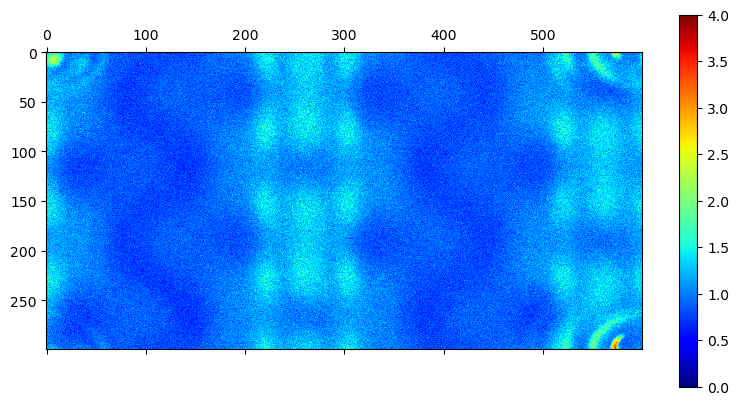

In [109]:
show = wrap_r_into_b_(r_untrained, b_untrained)
hist = np.histogramdd(np.stack([show[...,1].flatten(),show[...,0].flatten()],axis=-1), bins=[300,600], range=[[0,1]]*2,
                          density=True,
                          )[0]
plt.matshow(hist,
            vmin = 0,
            vmax = 4,
            cmap='jet'
           )
plt.colorbar()

# important check:

In [ ]:
################
## can also indirectly check the ergodicity of the MD data that was used:
'''
If the samples from the models have consistent populations of conformers 
for crystallographically equivalent molecules, means that the MD data 
*(training + validation) was also ergodic (including the symmetry-related microstates). 
This is because a model is not symmetry-aware. 
For this reason this check is useful, because q(r) depends on this. 
q(r) or q(r,h) needs to mimic p(r) or p(r,h), including symmetric states.
(i.e., both ensemble averages in BAR need to agree on the symmetric states)
    This can only be achieved when the MD data was sufficiently ergodic (*).
    In this case the FEs at the top of the notebook are correct.
        This is also why the red dots were used (a consistency check).
'''
## TODO: upload all the models in a similar way to allow these checks.

In [166]:
all_unique = []
for form in list_forms:
    all_unique += nns_GAFF[form].model.ic_maps[0].flexible_torsions.tolist()

check_GAFF = dict(zip([x[0] for x in all_unique],all_unique))
check_GAFF

6 fully flexible torsions in the initialisation dataset are:
[[ 0  1  5 10]
 [ 6  1  5 10]
 [ 7  1  5 10]
 [42 33 26 23]
 [43 33 26 23]
 [44 33 26 23]]
[these indices refer to atom indices labeled on self.mol]
5 fully flexible torsions in the initialisation dataset are:
[[ 6  1  5 10]
 [ 7  1  5 10]
 [42 33 26 23]
 [43 33 26 23]
 [44 33 26 23]]
[these indices refer to atom indices labeled on self.mol]
6 fully flexible torsions in the initialisation dataset are:
[[ 0  1  5 10]
 [ 6  1  5 10]
 [ 7  1  5 10]
 [42 33 26 23]
 [43 33 26 23]
 [44 33 26 23]]
[these indices refer to atom indices labeled on self.mol]


{0: [0, 1, 5, 10],
 6: [6, 1, 5, 10],
 7: [7, 1, 5, 10],
 42: [42, 33, 26, 23],
 43: [43, 33, 26, 23],
 44: [44, 33, 26, 23]}

In [167]:
all_unique = []
for form in list_forms:
    all_unique += nns_TMFF[form].model.ic_maps[0].flexible_torsions.tolist()

check_TMFF = dict(zip([x[0] for x in all_unique],all_unique))
check_TMFF

6 fully flexible torsions in the initialisation dataset are:
[[ 0  1  5 10]
 [ 6  1  5 10]
 [ 7  1  5 10]
 [42 33 26 23]
 [43 33 26 23]
 [44 33 26 23]]
[these indices refer to atom indices labeled on self.mol]
3 fully flexible torsions in the initialisation dataset are:
[[42 33 26 23]
 [43 33 26 23]
 [44 33 26 23]]
[these indices refer to atom indices labeled on self.mol]
4 fully flexible torsions in the initialisation dataset are:
[[ 6  1  5 10]
 [42 33 26 23]
 [43 33 26 23]
 [44 33 26 23]]
[these indices refer to atom indices labeled on self.mol]


{0: [0, 1, 5, 10],
 6: [6, 1, 5, 10],
 7: [7, 1, 5, 10],
 42: [42, 33, 26, 23],
 43: [43, 33, 26, 23],
 44: [44, 33, 26, 23]}

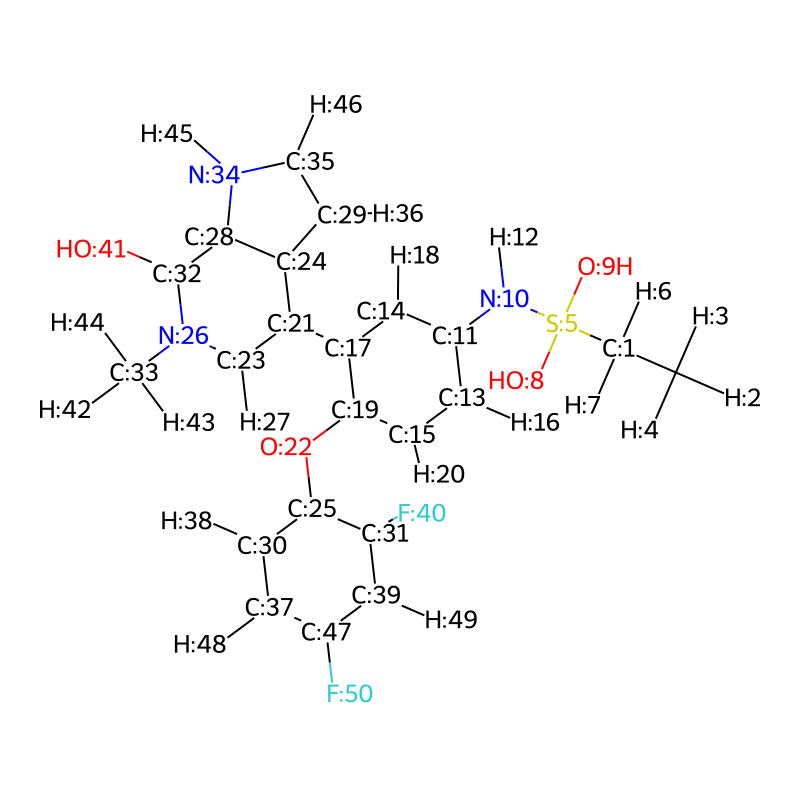

In [136]:
plot_mol_larger_(nns_TMFF[form].model.ic_maps[0].mol)
# [H3,H2,H4] methyl group was sym-reduced
# [H44,H42,H43] methyl group was sym-randomised
# [H6,H7] was randomised only in GAFF

In [151]:
[nn.load_samples_() for nn in nns_GAFF.values()];

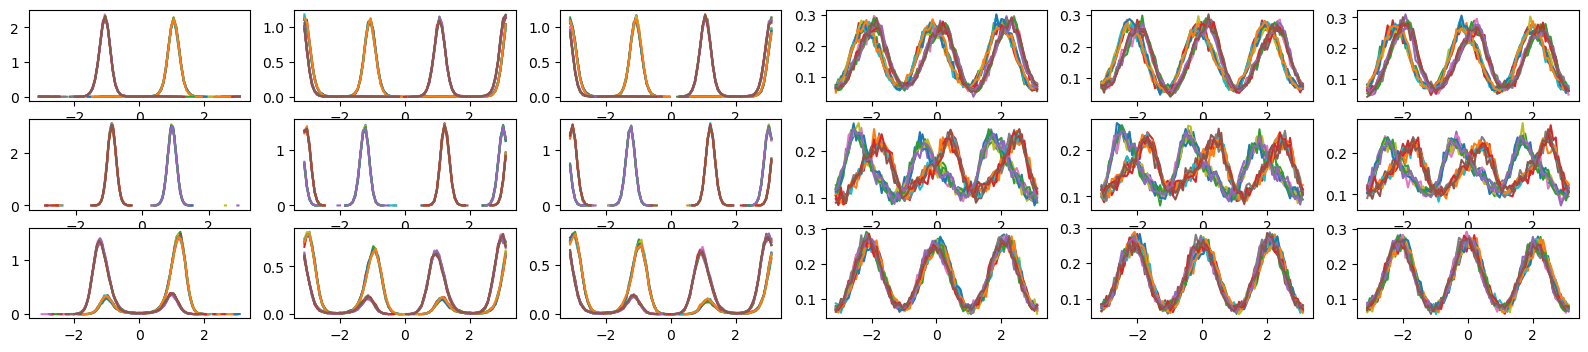

In [179]:
n_forms = len(list_forms)
n_flexible = len(check_GAFF.keys()) # 6
fig, ax = plt.subplots(n_forms, n_flexible, figsize=(20,4))
for i in range(n_forms):
    # states 
    form = list_forms[i]
    for j in range(n_flexible):
        # torsions
        atom_index = [x for x in check_GAFF.keys()][j]
        inds_torsion = check_GAFF[atom_index]
        phi = get_torsion_np_(
                reshape_to_molecules_np_(rb_to_r_b_(nns_GAFF[form].samples_from_model[0])[0], n_atoms_in_molecule=51, n_molecules=16),
                inds_torsion,
                )
        for k in range(16):
            # molecules
            plot_1D_histogram_(phi[:,k], ax=ax[i,j], mask_0=True)

In [175]:
[nn.load_samples_() for nn in nns_TMFF.values()];

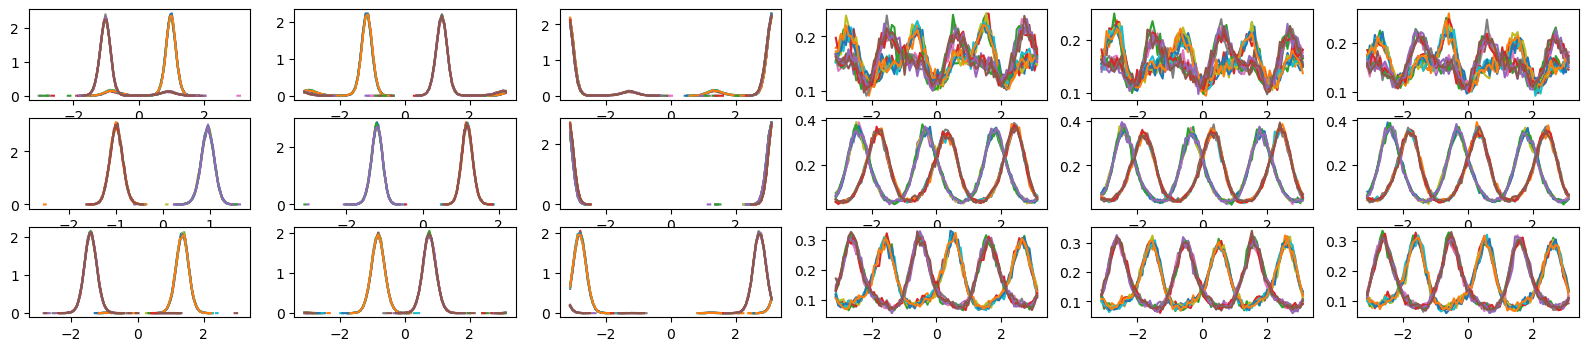

In [180]:
n_forms = len(list_forms)
n_flexible = len(check_TMFF.keys()) # 6
fig, ax = plt.subplots(n_forms, n_flexible, figsize=(20,4))
for i in range(n_forms):
    # states 
    form = list_forms[i]
    for j in range(n_flexible):
        # torsions
        atom_index = [x for x in check_TMFF.keys()][j]
        inds_torsion = check_TMFF[atom_index]
        phi = get_torsion_np_(
                reshape_to_molecules_np_(rb_to_r_b_(nns_TMFF[form].samples_from_model[0])[0], n_atoms_in_molecule=51, n_molecules=16),
                inds_torsion,
                )
        for k in range(16):
            # molecules
            plot_1D_histogram_(phi[:,k], ax=ax[i,j], mask_0=True)

In [ ]:
# Looks like all three forms have two crystallographically unique molecules. 
# All molecules were sampled well (at least in 1D).
# can see differences between GAFF and TMFF, but there is also a 100K difference in temperature involved here.